In [1]:
suppressPackageStartupMessages({
  library(cowplot)
  library(dataorganizer)
  library(dplyr)
  library(magrittr)
  library(Matrix)
  library(readr)
  library(ggplot2)
  library(Seurat)
  library(sccore)
  library(tictoc)
})

theme_set(theme_bw())

## Spatial

In [2]:
tic()
spat_info <- DatasetPath("human_breast_cancer") %>%
    ReadXenium(outs='matrix')
so_spatial <- spat_info$matrix %>% CreateAssay5Object() %>% CreateSeuratObject() %>%
    NormalizeData()
toc()
so_spatial

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Normalizing layer: counts.Gene Expression

Normalizing layer: counts.Blank Codeword

Normalizing layer: counts.Negative Control Codeword

Normalizing layer: counts.Negative Control Probe



10.658 sec elapsed


An object of class Seurat 
541 features across 167780 samples within 1 assay 
Active assay: RNA (541 features, 0 variable features)
 8 layers present: counts.Gene Expression, counts.Blank Codeword, counts.Negative Control Codeword, counts.Negative Control Probe, data.Gene Expression, data.Blank Codeword, data.Negative Control Codeword, data.Negative Control Probe

In [3]:
so_spatial[['spatial']] <- spat_info$centroids %>%
    {set_rownames(.[,c('x', 'y')], .$cell)} %>%
    as.matrix() %>% set_colnames(c('spatial_1', 'spatial_2')) %>%
    CreateDimReducObject(key='spatial_', assay='RNA')

In [4]:
cell_annot_spat <- DatasetPath("human_breast_cancer", "GSM7780153_Xenium_R1_Fig1-5_supervised.csv") %>%
    read_csv(show_col_types=FALSE) %$% Cluster

so_spatial$cell_type <- cell_annot_spat

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



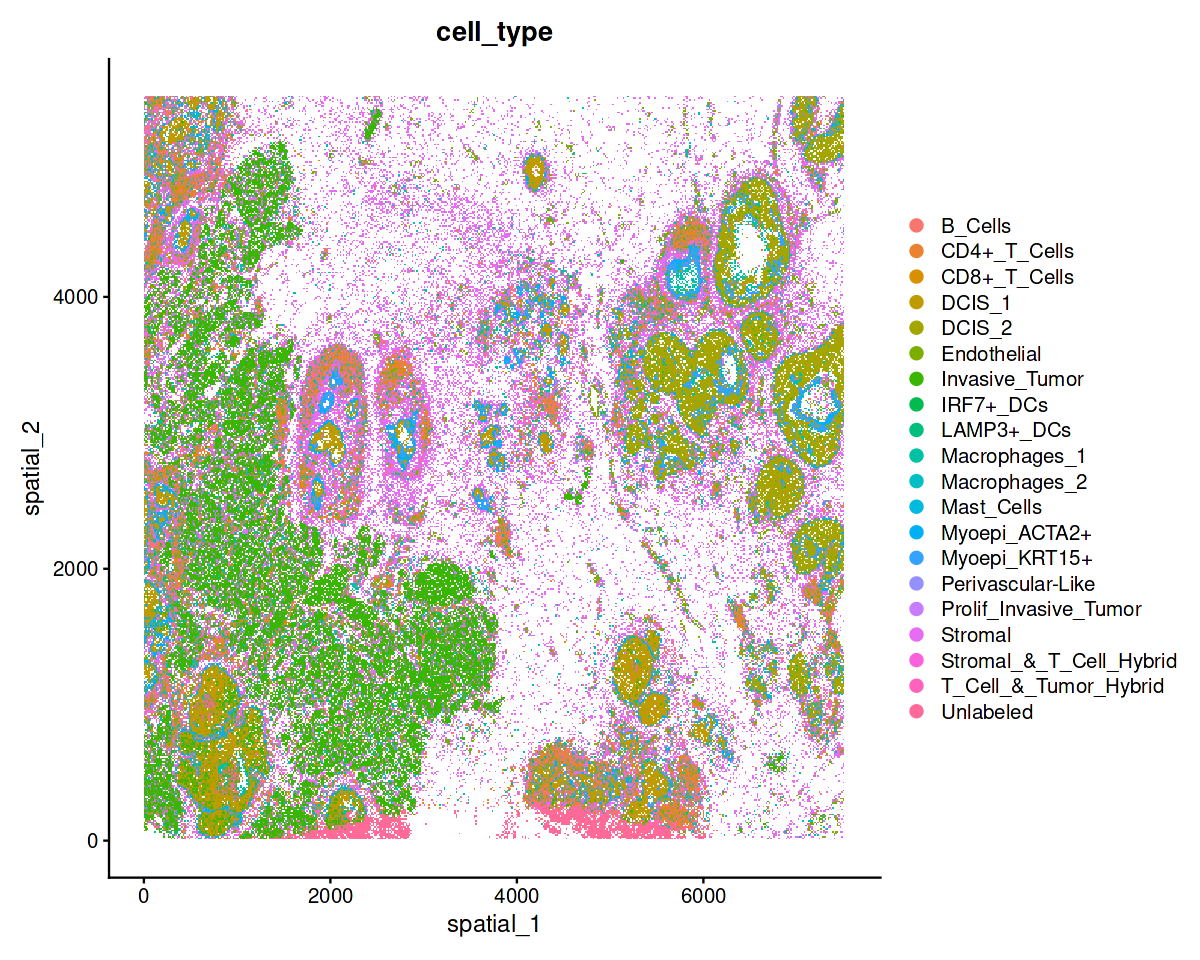

In [5]:
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(so_spatial, group.by='cell_type', reduction='spatial')

In [6]:
so_spatial <- so_spatial$cell_type %>% {names(.)[. != 'Unlabeled']} %>% {subset(so_spatial, cells=.)}

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



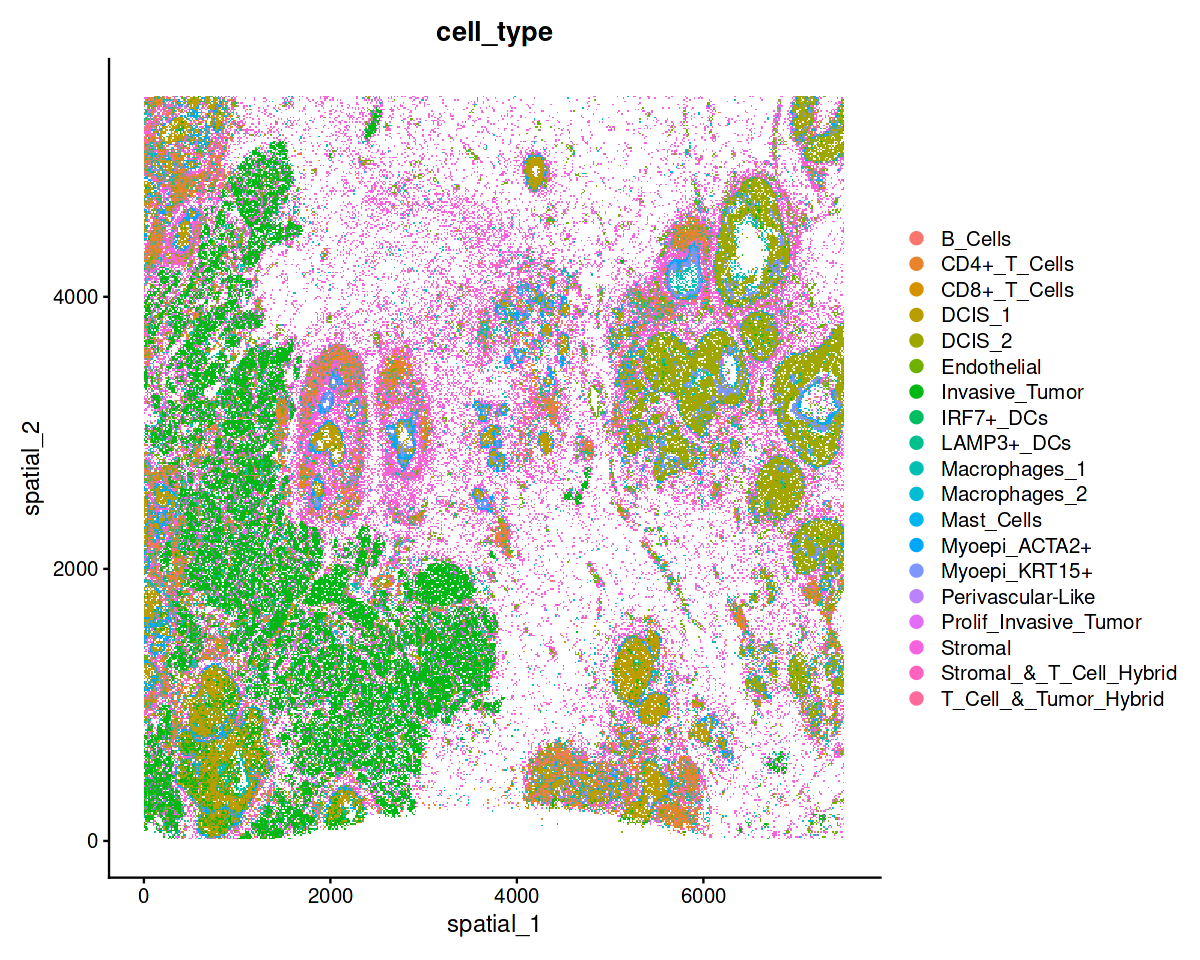

In [7]:
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(so_spatial, group.by='cell_type', reduction='spatial')

In [37]:
tic()
so_spatial %<>% ScaleData(layer='data.Gene Expression')
toc()

tic()
so_spatial %<>%
    RunPCA(features=rownames(so_spatial[['RNA']]$`data.Gene Expression`)) %>%
    FindNeighbors(dims=1:30)
toc()

tic()
so_spatial %<>%
    RunUMAP(dims=1:30) %>%
    FindClusters(resolution = 0.25, algorithm=2)
toc()

Centering and scaling data matrix



14.244 sec elapsed


PC_ 1 
Positive:  PTPRC, CXCL12, ZEB2, LUM, CCDC80, CD4, TRAC, S100A4, IL7R, POSTN 
	   CD3E, LYZ, PTGDS, LDHB, IL2RG, CYTIP, GPR183, CXCR4, FGL2, MMP2 
	   AIF1, FBLN1, GLIPR1, PRDM1, CD68, TCF4, PDK4, CCL5, FCER1G, PECAM1 
Negative:  EPCAM, KRT8, KRT7, MLPH, TACSTD2, FOXA1, FASN, CDH1, CD9, GATA3 
	   ANKRD30A, SCD, DSP, MYO5B, LYPD3, S100A14, ABCC11, ELF3, SERHL2, AR 
	   CCND1, ERBB2, CTTN, TPD52, TRAF4, TFAP2A, NARS, CCDC6, SLC5A6, KLF5 
PC_ 2 
Positive:  CD3E, PTPRC, IL7R, CYTIP, TRAC, CXCR4, CD3D, IL2RG, CD247, CD3G 
	   CD69, GZMA, CCL5, LTB, CCR7, SLAMF1, KLRB1, SELL, GPR183, CD8A 
	   CD27, TIGIT, KLRD1, CTLA4, TCF7, KLRC1, PRF1, MS4A1, NKG7, SMAP2 
Negative:  CAV1, PDGFRB, AQP1, TCF4, MYLK, MMP2, ACTA2, POSTN, CD93, CLEC14A 
	   RAMP2, VWF, KDR, FBLIM1, FBLN1, CCDC80, ZEB1, PDGFRA, CRISPLD2, DST 
	   MMRN2, EDNRB, SVIL, PECAM1, LUM, CXCL12, SFRP1, IGF1, EGFR, HOXD9 
PC_ 3 
Positive:  CLEC14A, RAMP2, MMRN2, KDR, HOXD9, VWF, NOSTRIN, AQP1, SOX17, IL3RA 
	   EGFL7, CAV1, CAVIN2

342.138 sec elapsed


08:40:58 UMAP embedding parameters a = 0.9922 b = 1.112

08:40:58 Read 159226 rows and found 30 numeric columns

08:40:58 Using Annoy for neighbor search, n_neighbors = 30

08:40:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:41:59 Writing NN index file to temp file /tmp/RtmpSjjpk7/filec8be93a86e08e

08:41:59 Searching Annoy index using 1 thread, search_k = 3000

08:46:01 Annoy recall = 100%

08:46:06 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

08:46:20 Initializing from normalized Laplacian + noise (using RSpectra)

08:46:35 Commencing optimization for 200 epochs, with 7586218 positive edges

08:49:59 Optimization finished



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 159226
Number of edges: 4633356

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.9384
Number of communities: 17
Elapsed time: 354 seconds


3 singletons identified. 14 final clusters.



907.206 sec elapsed


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



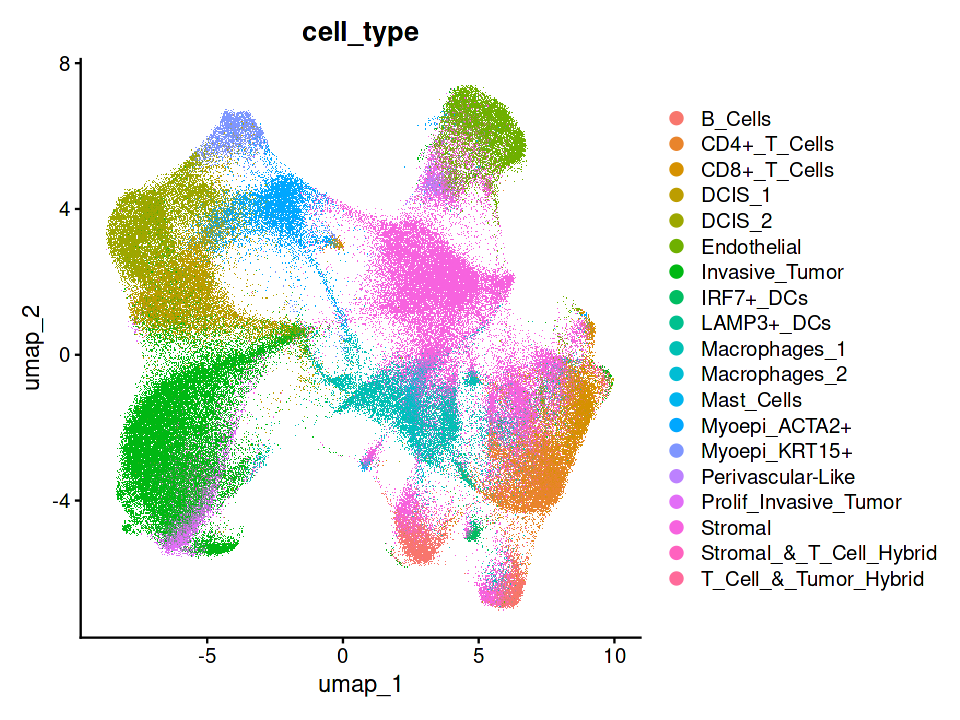

In [39]:
options(repr.plot.width=8, repr.plot.height=6)
UMAPPlot(so_spatial, group.by='cell_type')

In [40]:
Idents(so_spatial) <- so_spatial$cell_type

### Save

In [41]:
DatasetPath("human_breast_cancer", 'so.rds') %>%
    write_rds(so_spatial, .)

## RNA

In [8]:
cell_meta_rna <- DatasetPath("human_breast_cancer_rna", "umap_annotation.csv") %>%
    read_csv(show_col_types=FALSE)

In [9]:
tic()
cm_rna_raw <- DatasetPath("human_breast_cancer_rna", "GSM7782698_count_raw_feature_bc_matrix.h5") %>%
    Seurat::Read10X_h5()

so_rna <- cm_rna_raw %>% CreateAssay5Object() %>% CreateSeuratObject() %>%
    subset(cells=cell_meta_rna$Barcode) %>% NormalizeData()
toc()
so_rna

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Normalizing layer: counts



30.532 sec elapsed


An object of class Seurat 
37143 features across 27472 samples within 1 assay 
Active assay: RNA (37143 features, 0 variable features)
 2 layers present: counts, data

In [10]:
doublet_info <- DatasetPath("human_breast_cancer_rna", "doublet_scores.csv") %>%
    read_csv(show_col_types=FALSE)
doublet_info %<>% .[2:3] %>% lapply(setNames, doublet_info[[1]])

New names:
• `` -> `...1`


Warning message:
“replacing previous import ‘Matrix::cov2cor’ by ‘stats::cov2cor’ when loading ‘dropestr’”
Warning message:
“replacing previous import ‘Matrix::toeplitz’ by ‘stats::toeplitz’ when loading ‘dropestr’”
Warning message:
“replacing previous import ‘Matrix::update’ by ‘stats::update’ when loading ‘dropestr’”


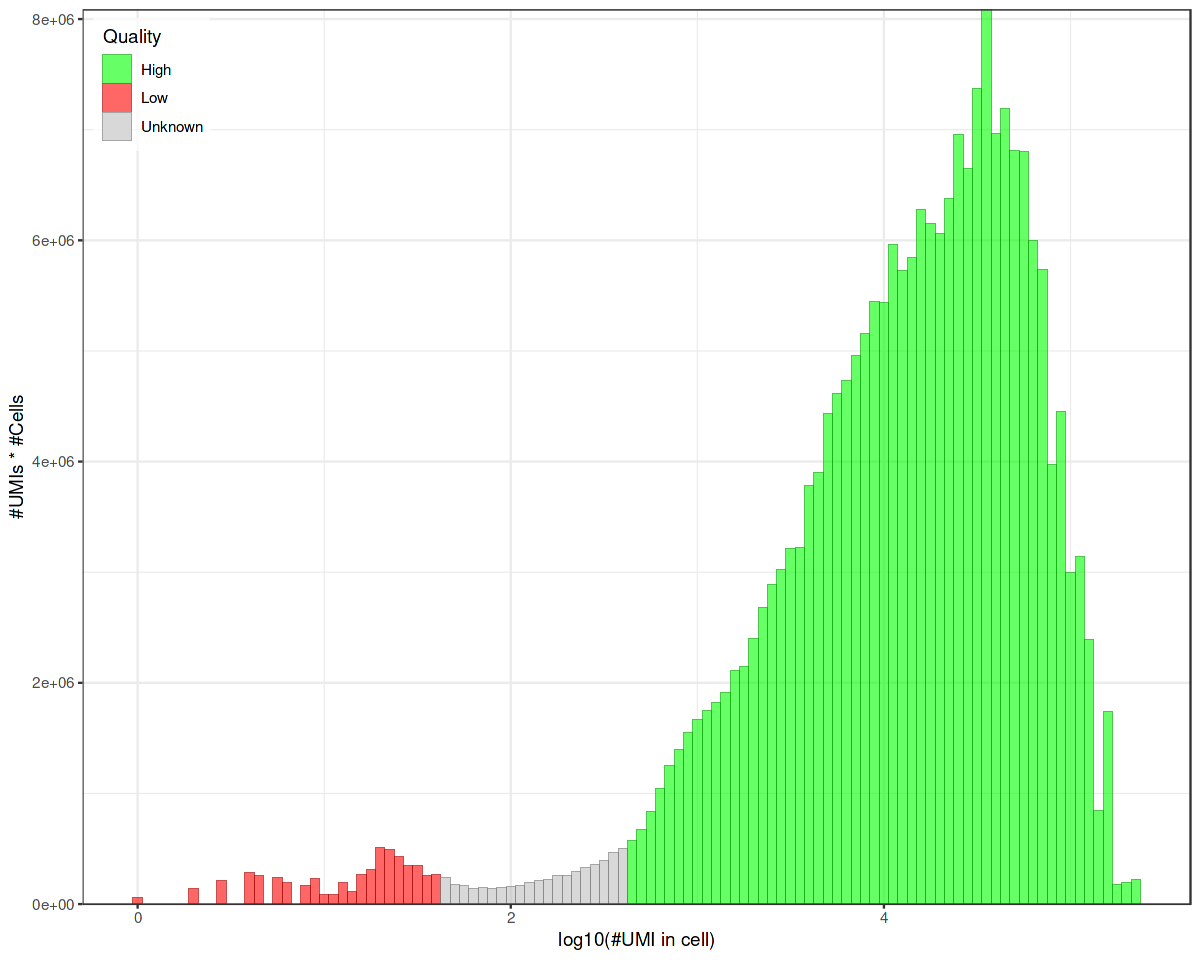

In [11]:
colSums(cm_rna_raw) %>% dropestr::PlotCellsNumberHist(estimate.cells.number=TRUE)

In [12]:
so_rna[['umap_paper']] <- cell_meta_rna[,c('UMAP-X', 'UMAP-Y')] %>%
    rename(UMAP_1=`UMAP-X`, UMAP_2=`UMAP-Y`) %>%
    as.matrix() %>% set_rownames(cell_meta_rna$Barcode) %>%
    CreateDimReducObject(key='UMAP_', assay='RNA')

so_rna$cell_type <- cell_meta_rna %$% setNames(Annotation, Barcode) %>% .[colnames(so_rna)]

In [13]:
so_rna$doublet_score <- doublet_info$doublet_score[colnames(so_rna)]
so_rna$is_doublet <- doublet_info$predicted_doublet[colnames(so_rna)]

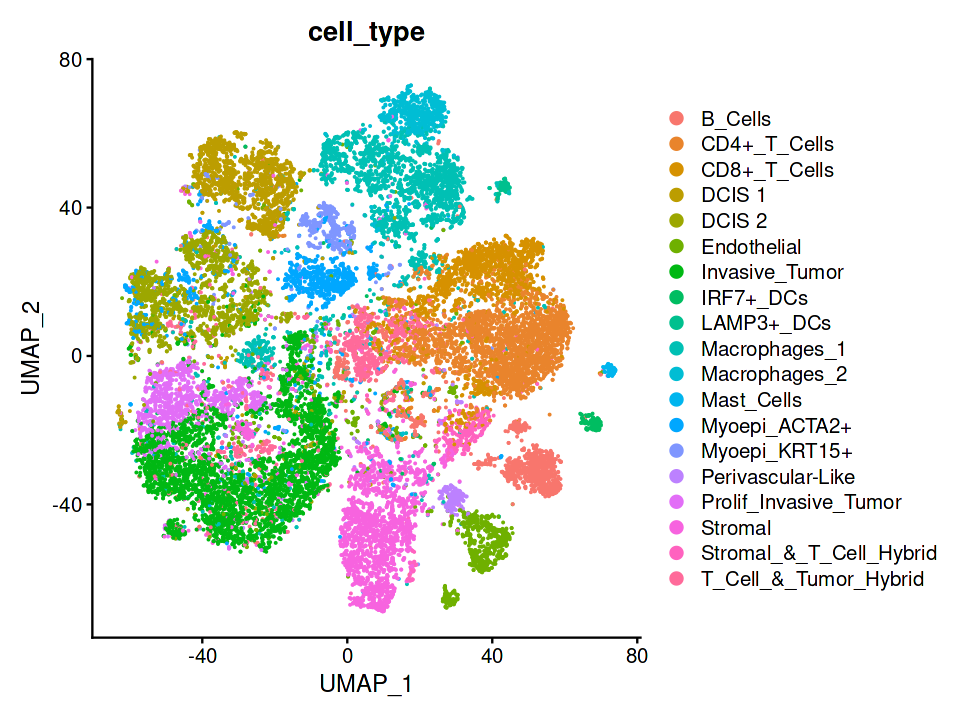

In [14]:
options(repr.plot.width=8, repr.plot.height=6)
DimPlot(so_rna, group.by='cell_type', reduction='umap_paper')

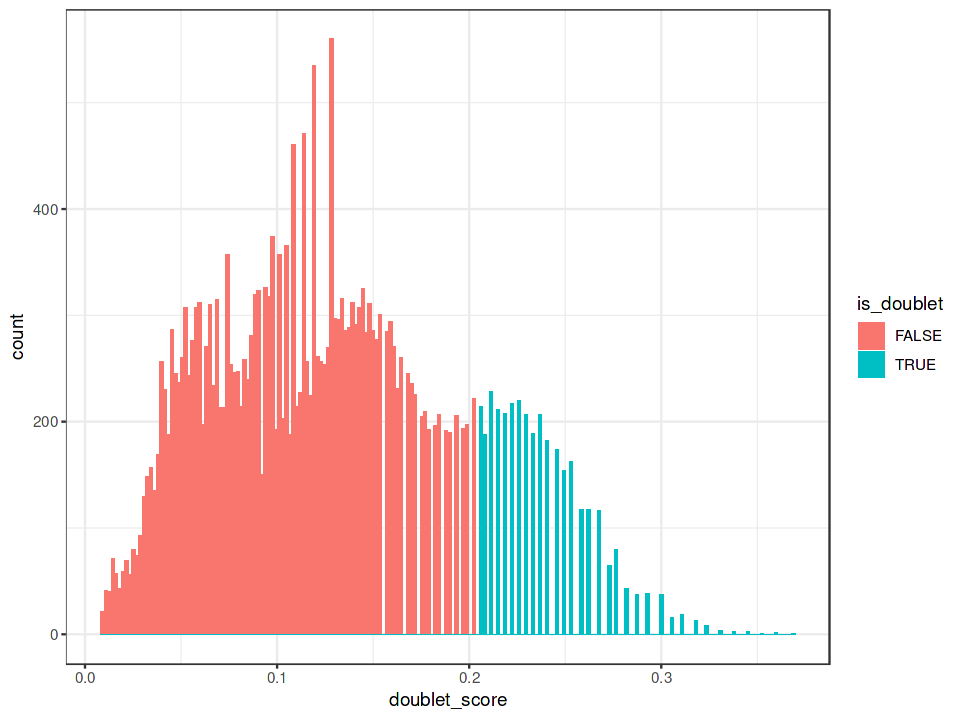

In [15]:
ggplot(so_rna@meta.data) +
    geom_histogram(aes(x=doublet_score, fill=is_doublet), bins=200)

In [16]:
so_rna$is_doublet <- (so_rna$doublet_score > 0.19)

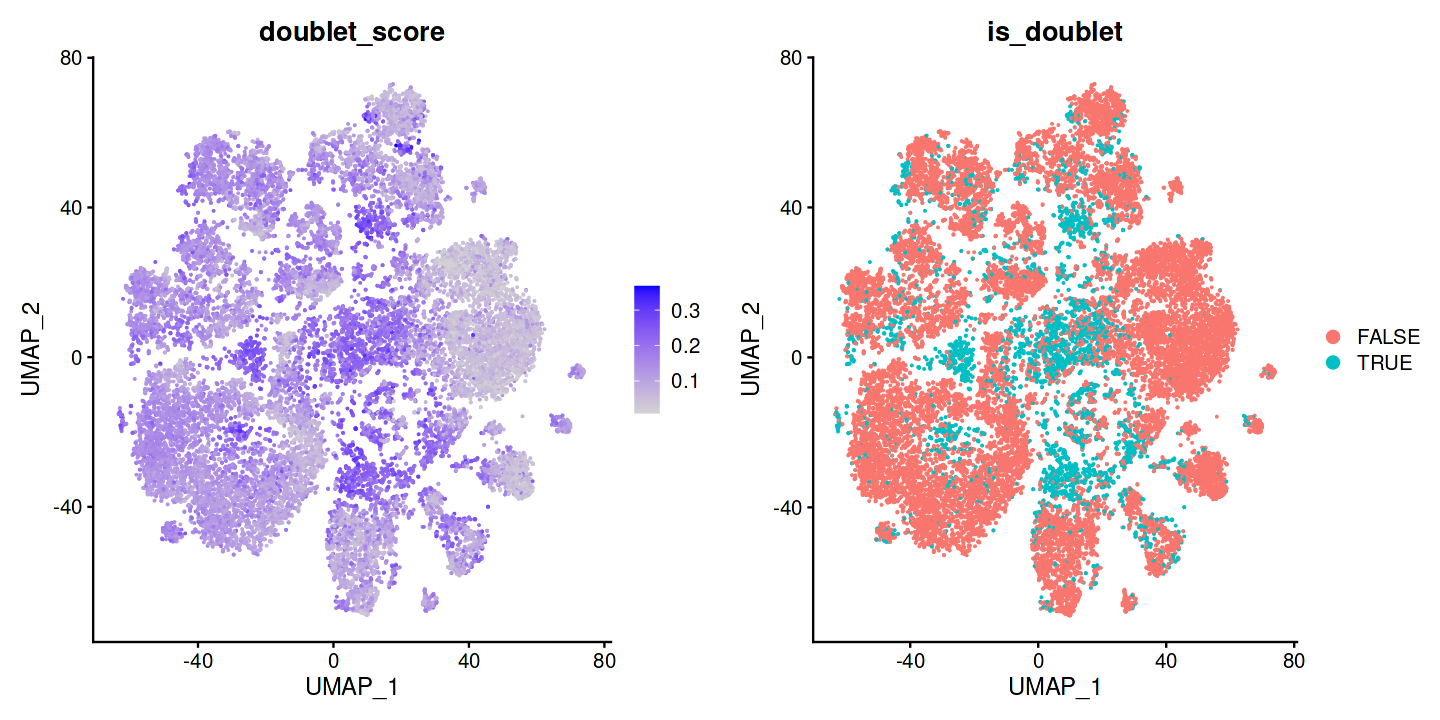

In [17]:
options(repr.plot.width=12, repr.plot.height=6)
cowplot::plot_grid(
    FeaturePlot(so_rna, features='doublet_score', reduction='umap_paper'),
    DimPlot(so_rna, group.by='is_doublet', reduction='umap_paper'),
    ncol=2
)


### Basic processing

In [18]:
so_rna %<>% subset(cells=colnames(.)[
    (!.$is_doublet) & (!grepl("Hybrid", .$cell_type))
])

so_rna

An object of class Seurat 
37143 features across 22306 samples within 1 assay 
Active assay: RNA (37143 features, 0 variable features)
 2 layers present: counts, data
 1 dimensional reduction calculated: umap_paper

In [19]:
tic()
so_rna %<>%
    FindVariableFeatures(selection.method="vst", nfeatures = 2000) %>%
    ScaleData()
toc()

Finding variable features for layer counts

Centering and scaling data matrix



5.566 sec elapsed


In [20]:
tic()
so_rna %<>%
    RunPCA(., features=VariableFeatures(.)) %>%
    FindNeighbors(dims=1:30)
toc()

PC_ 1 
Positive:  COL6A2, COL6A1, SPARC, COL6A3, FSTL1, COL3A1, COL1A2, LAMB1, VCAN, C1S 
	   FBN1, DCN, IGFBP7, LUM, CALD1, AEBP1, POSTN, BGN, COL5A2, FN1 
	   C1R, COL5A1, VIM, MMP2, COL1A1, SFRP2, TIMP3, CDH11, COL14A1, THBS2 
Negative:  ZWINT, HMGCS2, ALDH3B2, SCD, PVALB, RRM2, HIST1H1B, FADS2, TAT, FIBCD1 
	   ECM1, PIP, NQO1, AGR2, CLDN4, NUSAP1, CDK1, LMNB1, HSPA1B, UHRF1 
	   KIFC1, TYMS, ANLN, GPRC5A, MKI67, PHGDH, FOXM1, HIST1H1D, ECT2, MCM4 
PC_ 2 
Positive:  LAPTM5, SRGN, CIITA, MS4A6A, ADA2, RGS1, LTB, CYBB, MS4A7, CD163 
	   SPI1, CSF1R, MPEG1, CD52, ITGAX, TYROBP, C1QA, FGL2, CSF2RA, C1QB 
	   SIGLEC1, C1QC, CTSS, LYZ, HSPA6, WDFY4, SLCO2B1, ADAP2, STAB1, GPR34 
Negative:  TPM1, TACSTD2, ACTN1, TIMP1, SDC1, THBS1, MYL9, CLDN4, CALD1, COL18A1 
	   IGFBP4, CEACAM6, NOTCH3, AGR2, TM4SF1, DEPRECATED-ENSG00000171345, MGP, S100P, TAGLN, NQO1 
	   TFF3, PLAT, TNC, CLU, CD24, S100A14, SLC39A6, KRT19, NTN4, COL6A2 
PC_ 3 
Positive:  KRT17, KRT5, DEPRECATED-ENSG00000128422, KRT14,

15.212 sec elapsed


In [21]:
tic()
so_rna %<>%
    RunUMAP(dims=1:30, n.epochs=500) %>%
    FindClusters(resolution = 1.5, algorithm=2)
toc()

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:21:16 UMAP embedding parameters a = 0.9922 b = 1.112

10:21:16 Read 22306 rows and found 30 numeric columns

10:21:16 Using Annoy for neighbor search, n_neighbors = 30

10:21:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:21:18 Writing NN index file to temp file /tmp/RtmpPatOxu/filee15ce1e4be0fe

10:21:18 Searching Annoy index using 1 thread, search_k = 3000

10:21:25 Annoy recall = 100%

10:21:25 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22306
Number of edges: 827536

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.9580
Number of communities: 17
Elapsed time: 2 seconds
29.829 sec elapsed


In [24]:
# options(repr.plot.width=6, repr.plot.height=6)
# Embeddings(so_rna, 'umap') %>%
#     embeddingPlot(groups=cl, show.ticks=TRUE)

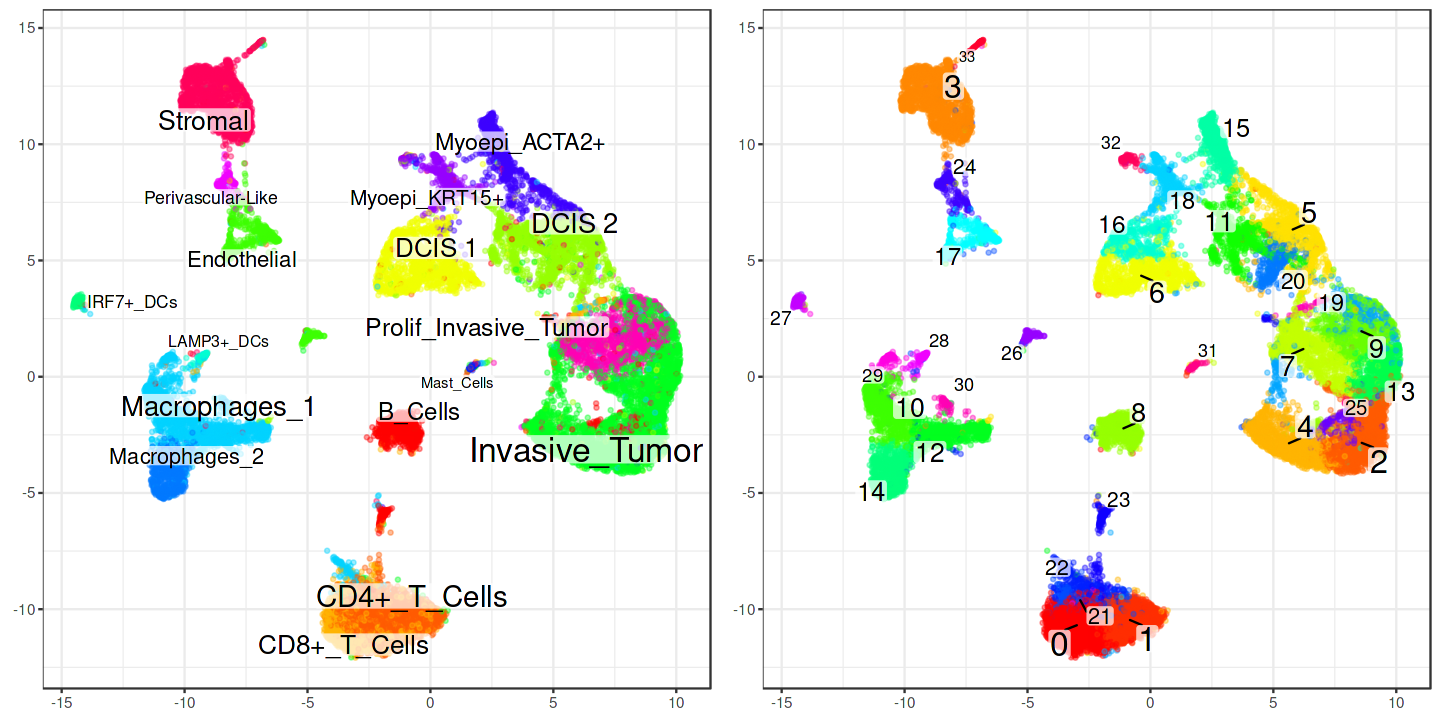

In [25]:
options(repr.plot.width=12, repr.plot.height=6)
# DimPlot(so_rna, group.by='cell_type', reduction='umap')
c('cell_type', 'seurat_clusters') %>% lapply(\(n) {
    Embeddings(so_rna, 'umap') %>%
        embeddingPlot(groups=setNames(so_rna[[n]][,1], colnames(so_rna)), show.ticks=TRUE)
        #xlim(1.5, 2.5) + ylim(0.0, 0.75)
}) %>% plot_grid(plotlist=., ncol=2)

In [27]:
so_rna$cell_type_filt <- so_rna$cell_type
so_rna$cell_type_filt[so_rna$seurat_clusters == '33'] <- 'Adipocytes' # ADIPOQ, ADH1B, and PLIN4
so_rna$cell_type_filt[so_rna$seurat_clusters == '23'] <- 'Plasma' # MZB1, CD38, SDC1
so_rna$cell_type_filt[so_rna$seurat_clusters %in% c('22', '30')] <- 'doublets' # CD14, CD68 vs CD4 and vs MKI67, TOP2A, HJURP

In [28]:
ct_per_clust <- so_rna$seurat_clusters %>% split(names(.), .) %>% sapply(\(cids) {
    table(so_rna$cell_type_filt[cids]) %>% which.max() %>% names()
})

so_rna$cell_type_adj <- as.vector(ct_per_clust[so_rna$seurat_clusters])

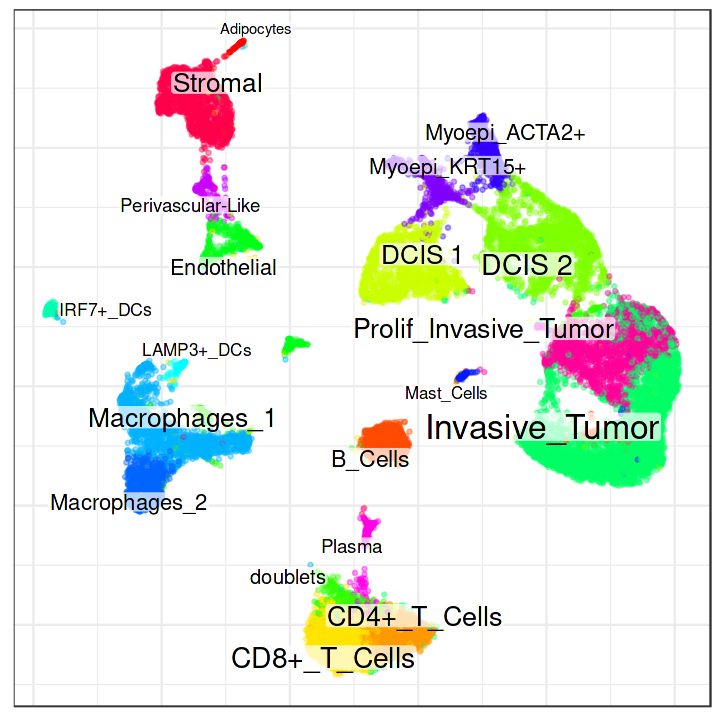

In [29]:
options(repr.plot.width=6, repr.plot.height=6)
Embeddings(so_rna, 'umap') %>%
    embeddingPlot(groups=so_rna$cell_type_adj)

### Correct cell type names

In [36]:
so_rna$cell_type[grep('DCIS', so_rna$cell_type)] %<>% gsub(' ', '_', .)
so_rna$cell_type_filt[grep('DCIS', so_rna$cell_type_filt)] %<>% gsub(' ', '_', .)
so_rna$cell_type_adj[grep('DCIS', so_rna$cell_type_adj)] %<>% gsub(' ', '_', .)

In [31]:
so_rna$cell_type %>% unique() %>% setdiff(so_spatial$cell_type)

character(0)

In [32]:
so_spatial$cell_type %>% unique() %>% setdiff(so_rna$cell_type)

[1] "T_Cell_&_Tumor_Hybrid"   "Stromal_&_T_Cell_Hybrid"

### Save

In [37]:
DatasetPath("human_breast_cancer_rna", "so.rds") %>% write_rds(so_rna, .)